In [3]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import cv2
import matplotlib.pyplot as plt
from mpl_toolkits.axes_grid1 import ImageGrid

def show_img(img, dpi=150, title=None):
    fig, ax = plt.subplots(nrows=1, ncols=1, dpi=dpi)
    ax.set_title( title, fontsize=16, color='black')
    ax.axis('off')
    ax.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))
    return fig, ax

def show_imgs(imgs_dict:dict, ncol=0, dpi=400, font_scale=0.2):
    font_size = int(plt.rcParams["font.size"]*font_scale)

    if ncol > 0:
        nrow = ((len(imgs_dict)-1)//ncol)+1
    else:
        nrow = 1
        ncol = len(imgs_dict)

    img_num = len(imgs_dict)
    fig = plt.figure(figsize=(float(img_num), float(img_num)), dpi=dpi)
    grid = ImageGrid(fig, 111, nrows_ncols=(nrow, ncol), axes_pad=0.2,)

    for i in range(nrow*ncol):
        grid[i].axis('off')
        if i < len(imgs_dict):
            img_key = list(imgs_dict.keys())[i]
            grid[i].imshow(cv2.cvtColor(imgs_dict[img_key], cv2.COLOR_BGR2RGB))
            grid[i].set_title(img_key, fontsize=font_size, color='black', pad=int(font_size/2))
    
    plt.show(); plt.close()
    return None

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [4]:
def alpha_blend(img1, img2, alpha=0.5):
    '''
    alpha = 1.0 : img1 のみ
    alpha = 0.0 : img2 のみ
    '''

    return cv2.addWeighted(img1, alpha, img2, 1 - alpha, 0)

(256, 256, 3)


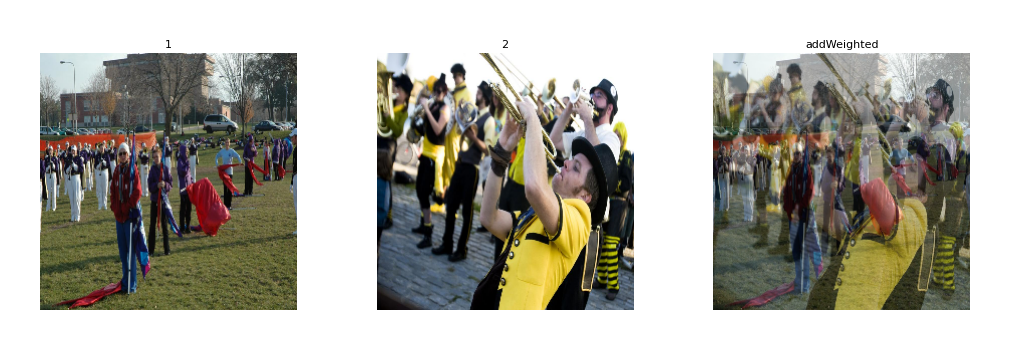

In [7]:
imgs = {}

imgs["1"] = cv2.imread("../../sample_data/WIDER_OpenData/0--Parade/0_Parade_marchingband_1_104.jpg")
imgs["2"] = cv2.imread("../../sample_data/WIDER_OpenData/0--Parade/0_Parade_marchingband_1_139.jpg")

imgs["1"] = cv2.resize(imgs["1"], (256, 256))
imgs["2"] = cv2.resize(imgs["2"], (256, 256))

imgs["addWeighted"] = alpha_blend(imgs["1"], imgs["2"], alpha=0.5)
print(imgs["addWeighted"].shape)

show_imgs(imgs)